<a href="https://colab.research.google.com/github/cristianegea/Aurelien_Geron_Hands_on_Machine_Learning/blob/main/1_The_Machine_Learning_Landscape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Livro: Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems

# Autor: Aurélien Géron

# Chapter 1 - The Machine Learning Landscape

## 1. What is Machine Learning?

Machine Learning é o campo de estudo que dá aos computadores a capacidade de aprender sem serem explicitamente programados (Arthur Samuel 1959).

Um programa de computador é aprende a partir da experiência E, acerca de alguma tarefa T e com alguma medida de desempenho P, e seu desempenho em T melhora com a experiência E (Tom Mitchell 1997).

Os exemplos que o sistema utiliza são chamados de conjunto de treinamento (trainning set), onde cada exemplo de treinamento é chamado de instância de treinamento (ou amostra).



## 2. Types of Machine Learning Systems

Critérios utilizados para diferenciar os diferentes tipos de sisyemas de aprendizado de máquinas:

* Se são, ou não, treinados com supervisão humana (aprendizado supervisionado, não supervisionado, semi-supervisionado, por reforço).

* Se podem, ou não, aprender incrementalmente na hora (aprendizado online, aprendizado por batch).

* Se trabalham simplesmente comparando novos pontos de dados com pontos de dados conhecidos, ou detectando padrões nos dados de treinamento e construindo um modelo preditivo (aprendizado baseado em instância, aprendizado baseado em modelo).

Os critérios acima não são exclusivos, mas podem ser combinados com quaisquer outros.


### 2.1. Supervised/Unsupervised Learning

Sistemas de aprendizado de máquinas podem ser classificados de acordo com o montante e o tipo de supervisão que eles obtém durante o treinamento.

**Aprendizado supervisionado (supervised learning)**:

* O conjunto de treinamento possui rótulos (ou seja, inclui as soluções desejáveis). Ex.: classificação, regressão.

* Principais algoritmos de aprendizado supervisionado: k-Nearest Neighbors (k-NN), Regressão Linear, Regressão Logística, Support Vector Machine (SVM), Decision Tree e Random Forest, Redes Neurais.

**Aprendizado não supervisionado (Unsupervised Learning)**:

* O conjunto de treinamento não possui rótulos (ou seja, o sistema aprende sem um professor).

* Principais algoritmos de aprendizado não supervisionado: agrupamento (K-Means, DBSCAN, Hierarchical Cluster Analysis - HCA), detecção de anomalias/detecção de novidades (One-class SVM, Isolation Forext), visualização/redução de dimensionalidade (Principal Component Analysis - PCA, Kernel PCA, Locally Linear Embedding - LLE, t-Distributed Stochastic Neighbor Embedding - t-SNE), regra de associação (Apriori, Eclat).

**Aprendizado semi-supervisionado (Semisupervised Learning)**:

* O conjunto de treinamento é parcialmente rotulado (ou seja, possui poucas instâncias rotuladas, enquanto as demais não estão rotuladas).

* A maioria dos algoritmos de aprendizado semi-supervisionado são combinações de algoritmos de aprendizado supervisionado e de aprendizado não supervisionado.

**Aprendizado por reforço (Reinforcement Learning)**:

* Possui uma dinâmica diferente dos demais tipos de aprendizado.

* O sistema de aprendizado (agente) pode observar o ambiente, selecionar e executar ações. Com isso, pode obter recompensas no retorno (ou penalidades na forma de recompensas negativas). A parti daí, o sistema deve aprender por si só qual é a melhor estratégia (política) a ser adotada para obter o máximo de recompensa ao longo do tempo. Uma política define qual ação o agente deve escolher em determinada situação.

### 2.2. Batch & Online Learning

O sistema de aprendizado de máquinas pode ser classificado pela capacidade de aprender incrementalmente a partir do fluxo de dados de entrada.

**Batch Learning (aprendizado offline)**:

* O sistema é incapaz de aprender incrementalmente. Assim, o sistema deve ser treinado utilizando todos os dados disponíveis.

* Esse tipo de aprendizado toma bastante tempo e recursos computacionais (principalmente feito offline).

* Inicialmente, o sistema é treinado. Posteriormente, é lançado em produção e executado sem aprender mais nada, aplicando somente o que já tinha aprendido.

* Para o sistema aprender novos dados é preciso treinar uma nova versão deste sistema no novo conjunto de dados (contendo tanto os dados antigos como os dados novos). Contudo, esse processo requer a substituição da versão antiga do sistema pela versão nova.

* O processo de treinamento, avaliação e produção do sistema pode ser automatizado, uma vez que o sistema de aprendizado por batch pode se adaptar a mudanças.

**Online Learning**:

* O sistema pode ser treinado incrementalmente pela alimentação das instâncias de dados sequencialmente, ou individualmente ou em pequenos grupos (mini-batches).

* Cada etapa de aprendizado, além de ser mais rápida, é menos custosa.

* É ideal para sistemas que recebem dados em um fluxo contínuo e precisam se adaptar rapidamente a mudanças.

### 2.3. Instance-Based Versus Model-Based Learning

Uma forma de categorizar os sistemas de aprendizado de máquinas é pela sua capacidade de generalização.

A maioria das tarefas de aprendizado de máquinas é sobre predições. Dado um número de exemplos de treinamentos, o sistema necessida ser capaz de fazer boas predições para os exemplos não vistos durante a etapa de treinamento. 

Abordagens para generalização:

* **Instance-based learning**: o sistema aprende os exemplos, então generaliza para os novos cados utilizando medidas de similaridade para compará-los aos exemplos de aprendizado.

* **Model-based learning**: primeiramente, é construído um modelo a partir dos exemplos e, posteriormente, este mesmo modelo é utilizado para fazer predições.

## Exemplo: Dinheiro traz felicidade? 

Hipótese a ser testada ($H_0$): dinheiro traz felicidade.  

$$
\text{life_satisfaction} = \theta_0 + \theta_1 \times \text{GDP_per_capita}
$$

onde $\text{life_satisfaction}$ corresponde a *Better Life Index* (fonte OCDE) e $\text{GDP_per_capita}$ corresponde ao PIB per capita (fonte FMI). O modelo possui 2 parâmetros, $\theta_0$ e $\theta_1$.

Antes de utilizar o modelo, é preciso definir o valor dos parâmetros $\theta_0$ e $\theta_1$.

Para problemas de regressão linear, geralmente é utilizada uma função de custo, que mede a distância entre as predições do modelo linear e os exemplos de treinamento. O objetivo é minimizar esta distância (minimizar a função de custo).

In [1]:
# Bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [7]:
# Preparação dos dados da OCDE com os dados do FMI
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

Segundo o autor, o código no livro espera que os arquivos dos dados sejam localizados no diretório atual (neste caso, diretório do autor no GitHub).

In [8]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [9]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [10]:
# Download the data 
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

In [12]:
# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

In [13]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

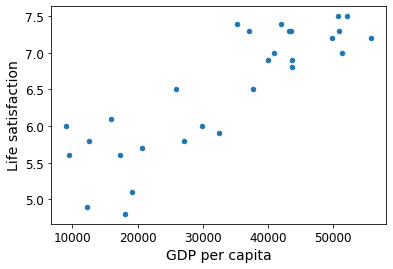

In [14]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

### (a) Regressão Linear

In [15]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

In [16]:
# Train the model
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# Make a prediction for Cyprus
X_new = [[22587]]           # Cyprus's GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

[[5.96242338]]


### (b) k-NN

In [19]:
from sklearn.neighbors import KNeighborsRegressor

# Select a linear model
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [20]:
# Train the model
model.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [21]:
# Make a prediction for Cyprus
X_new = [[22587]]           # Cyprus's GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

[[5.76666667]]


## 3. Main Challenges of Machine Learning

Os principais desafios enfrentados em uma tarefa de aprendizado de máquinas são:

* Quantidade insuficiente de dados de treinamento

* Dados de treinamento não representativos.

* Baixa qualidade dos dados (dados de treinamento com muitos erros, outliers e ruídos).

* Atributos irrelevantes.

* Overfitting dos dados de treinamento.

* Underfitting dos dados de treinamento.

## 4. Testing and Validating

A única forma de saber se um modelo possui uma boa capacidade de generalização é tentar executá-lo sobre novos casos. Uma forma de fazer isso é colocar o modelo em produção e monitorar o seu desempenho. 

Uma boa opção é dividir os dados em 2 conjuntos: conjunto de treinamento e conjunto de teste. Portanto, inicialmente o modelo será treinado com o conjunto de treinamento e testado com o conjunto de teste. A taxa de erro sobre os novos casos corresponderá ao erro de generalização. Por meio da avaliação do modelo sobre o conjunto de teste, é possível obter uma estimativa deste erro. Portanto, o erro de generalização informa quão bem o modelo performará sobre instâncias nunca vistas antes.

Se o erro de treinamento é baixo (o modelo erra pouco sobre o conjunto de treinamento) mas o erro de generalização é alto, então isso é indicativo de que o modelo está sobreajustando os dados de treinamento.


## 5. Hyperparameter Tuning and Model Selection

**Holdout validation**: parte do conjunto de treinamento é separado para avaliação dos modelos candidatos e seleção do melhor. Essa parte do conjunto de treinamento utilizada para avaliação dos modelos candidatos é chamada de conjunto de validação.

Mais especificamente, múltiplos modelos são treinados com vários hiperparâmetros sobre o conjunto de treinamento reduzido (conjunro de treinamento menos o conjunto de validação). O modelo selecionado será aquele que possui o melhor desempenho sobre o conjunto de validação. Depois deste processo de holdout validation, o melhor modelo é treinado sobre o conjunto de treinamento completo (original), obtendo um modelo final. Por fim, avalia-se este modelo final sobre o conjunto de teste para obter uma estimativa do erro de generalização.

Se o conjunto de validação é muito pequeno, então as avaliações do modelo serão imprecisas. Por outro lado, se o conjunto de validação for muito grande, então o conjunto de treinamento remanescente será muito pequeno (em relação ao conjunto de treinamento completo). Apesar de o modelo final ser treinado sobre o conjunto de treinamento completo, não é o ideal comparar modelos candidatos treinados sobre um conjunto de treinamento muito pequenos.

Uma alterantiva é a realização de repetidas validações cruzadas (*cross-validation*), utilizando muitos conjuntos de validação pequenos. Cada modelo é avaliado uma vez por conjunto de validação após ser treinado no restante dos dados. Esse processo permitirá um melhor medida de acurácia sobre o desempenho do modelo. Uma desvantagem é o tempo de treinamento (multiplicado pelo número de conjuntos de validação).